# SMOTE for imbalance binary classification

## Dependency

In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, \
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve, \
    precision_recall_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
pd.set_option('display.max_columns', None)
pd.set_option('expand_frame_repr', False)

## Parameter

In [25]:
CSV_01 = '../data/fracta_train.csv'
CSV_02 = '../data/fracta_test.csv'
CSV_03 = '../data/fracta_model.csv'
SAMPLING_STRATEGY_01 = 0.1
SAMPLING_STRATEGY_02 = 0.5
MAX_DEPTH = 3
LEARNING_RATE = 0.1
ALPHA = 10
COLSAMPLE_BYTREE = 0.3
EVAL_METRIC = 'aucpr'

## Read data

In [26]:
df_train = pd.read_csv(CSV_01, index_col='pipe_id')
df_test = pd.read_csv(CSV_02, index_col='pipe_id')
df_model = pd.read_csv(CSV_03, index_col='pipe_id')

In [27]:
print(df_train.shape)
print(df_test.shape)
print(df_model.shape)

(43397, 133)
(10850, 133)
(54247, 133)


In [6]:
df_train.head()

,target,age,log_diameter,material_a,material_c,material_d,material_o,material_s,log_env_dat_0,log_env_dat_1,log_env_dat_2,log_env_dat_3,log_env_dat_4,log_env_dat_5,log_env_dat_6,log_env_dat_7,log_env_dat_8,log_env_dat_9,log_env_dat_10,log_env_dat_11,log_env_dat_12,log_env_dat_13,log_env_dat_15,log_env_dat_16,log_env_dat_17,log_env_dat_19,log_env_dat_20,log_env_dat_22,log_env_dat_24,log_env_dat_27,log_env_dat_28,log_env_dat_30,log_env_dat_31,log_env_dat_32,log_env_dat_33,log_env_dat_34,log_env_dat_35,log_env_dat_36,log_env_dat_37,log_env_dat_40,log_env_dat_41,log_env_dat_42,log_env_dat_43,log_env_dat_44,log_env_dat_45,log_env_dat_46,log_env_dat_47,log_env_dat_48,log_env_dat_49,log_env_dat_50,log_env_dat_51,log_env_dat_52,log_env_dat_53,log_env_dat_55,log_env_dat_56,log_env_dat_57,log_env_dat_58,log_env_dat_59,log_env_dat_60,log_env_dat_61,log_env_dat_62,log_env_dat_63,log_env_dat_64,log_env_dat_65,log_env_dat_66,log_env_dat_69,log_env_dat_70,log_env_dat_71,log_env_dat_72,log_env_dat_73,log_env_dat_74,log_env_dat_75,log_env_dat_76,log_env_dat_77,log_env_dat_78,log_env_dat_79,log_env_dat_80,log_env_dat_81,log_env_dat_82,log_env_dat_83,log_env_dat_84,log_env_dat_85,log_env_dat_86,log_env_dat_87,log_env_dat_88,log_env_dat_89,log_env_dat_90,log_env_dat_91,log_env_dat_92,log_env_dat_93,log_env_dat_94,log_env_dat_95,log_env_dat_96,log_env_dat_97,log_env_dat_98,log_env_dat_99,log_env_dat_100,log_env_dat_105,log_env_dat_106,log_env_dat_109,log_env_dat_110,log_env_dat_111,log_env_dat_112,log_env_dat_113,log_env_dat_114,log_env_dat_115,log_env_dat_116,log_env_dat_117,log_env_dat_118,log_env_dat_121,log_env_dat_122,log_env_dat_123,log_env_dat_124,log_env_dat_125,log_env_dat_126,log_env_dat_127,log_env_dat_128,log_env_dat_129,log_env_dat_130,log_env_dat_131,log_env_dat_132,log_env_dat_133,log_env_dat_134,log_env_dat_135,log_env_dat_136,log_env_dat_137,log_env_dat_138,log_env_dat_139,log_env_dat_140,log_env_dat_141,log_env_dat_142,log_env_dat_143,log_env_dat_144
pipe_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P0000038571,0,11,3.704753,0,0,1,0,0,6.493633,2.884801,2.635479,2.302585,4.774653,-4.816077,-3.473768,-6.391808,-3.785510,-3.473768,-4.102955,-3.473768,-6.064131,-3.636469,-6.064131,-5.156274,-3.506558,-5.474012,-3.473768,-5.133521,-3.727440,-3.506558,1.818304,2.276585,-6.907755,2.251292,0.405465,3.091042,2.483798,4.267381,2.772658,0.458840,5.762513,0.375414,-2.341952,0.406132,1.098946,1.791926,2.197336,2.899679,2.206120,3.968523,-1.871439,-1.996336,1.514743,3.555348,4.983013,4.449936,4.455402,4.503117,4.669399,0.973658,0.488451,0.400429,1.020938,0.258971,-1.253568,2.512390,0.001000,5.044465,1.098946,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,2.714283,0.001000,-6.907755,-6.907755,5.351572,1.098946,3.268355,0.001000,-6.907755,-6.907755,3.924634,0.693647,-6.907755,-6.907755,4.087754,1.098946,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,4.488209,0.693647,5.207229,1.609638,-6.907755,-6.907755,5.468932,1.386544,3.924634,0.693647,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,6.428092,2.772589,-2.064830,5.294186,2.944439,7.608670,-6.255506,-1.591275,-6.907755,-6.907755
P0000009407,0,124,3.704753,0,1,0,0,0,6.440313,2.893020,2.650222,2.328897,3.989094,-5.339853,-3.473768,-6.907755,-3.713486,-3.473768,-4.893394,-3.473768,-5.040240,-3.854693,-4.818397,-6.255290,-3.506558,-4.464800,-3.473768,-4.811835,-3.506558,-3.506558,1.806260,2.171937,-6.907755,2.251292,0.405465,3.091042,2.307626,4.335572,2.568139,0.467543,5.758884,0.398889,-2.421775,0.406132,1.098946,1.791926,2.197336,2.813893,2.096223,4.123960,-2.019692,-2.134410,1.534811,3.555348,5.081615,4.442663,4.440563,4.465908,4.672838,0.693147,0.405022,0.339765,1.028122,-0.784228,-0.218641,4.426054,0.001000,4.212912,1.791926,-6.907755,-6.907755,-6.907755,-6.907755,-6.9

In [7]:
df_test.head()

,target,age,log_diameter,material_a,material_c,material_d,material_o,material_s,log_env_dat_0,log_env_dat_1,log_env_dat_2,log_env_dat_3,log_env_dat_4,log_env_dat_5,log_env_dat_6,log_env_dat_7,log_env_dat_8,log_env_dat_9,log_env_dat_10,log_env_dat_11,log_env_dat_12,log_env_dat_13,log_env_dat_15,log_env_dat_16,log_env_dat_17,log_env_dat_19,log_env_dat_20,log_env_dat_22,log_env_dat_24,log_env_dat_27,log_env_dat_28,log_env_dat_30,log_env_dat_31,log_env_dat_32,log_env_dat_33,log_env_dat_34,log_env_dat_35,log_env_dat_36,log_env_dat_37,log_env_dat_40,log_env_dat_41,log_env_dat_42,log_env_dat_43,log_env_dat_44,log_env_dat_45,log_env_dat_46,log_env_dat_47,log_env_dat_48,log_env_dat_49,log_env_dat_50,log_env_dat_51,log_env_dat_52,log_env_dat_53,log_env_dat_55,log_env_dat_56,log_env_dat_57,log_env_dat_58,log_env_dat_59,log_env_dat_60,log_env_dat_61,log_env_dat_62,log_env_dat_63,log_env_dat_64,log_env_dat_65,log_env_dat_66,log_env_dat_69,log_env_dat_70,log_env_dat_71,log_env_dat_72,log_env_dat_73,log_env_dat_74,log_env_dat_75,log_env_dat_76,log_env_dat_77,log_env_dat_78,log_env_dat_79,log_env_dat_80,log_env_dat_81,log_env_dat_82,log_env_dat_83,log_env_dat_84,log_env_dat_85,log_env_dat_86,log_env_dat_87,log_env_dat_88,log_env_dat_89,log_env_dat_90,log_env_dat_91,log_env_dat_92,log_env_dat_93,log_env_dat_94,log_env_dat_95,log_env_dat_96,log_env_dat_97,log_env_dat_98,log_env_dat_99,log_env_dat_100,log_env_dat_105,log_env_dat_106,log_env_dat_109,log_env_dat_110,log_env_dat_111,log_env_dat_112,log_env_dat_113,log_env_dat_114,log_env_dat_115,log_env_dat_116,log_env_dat_117,log_env_dat_118,log_env_dat_121,log_env_dat_122,log_env_dat_123,log_env_dat_124,log_env_dat_125,log_env_dat_126,log_env_dat_127,log_env_dat_128,log_env_dat_129,log_env_dat_130,log_env_dat_131,log_env_dat_132,log_env_dat_133,log_env_dat_134,log_env_dat_135,log_env_dat_136,log_env_dat_137,log_env_dat_138,log_env_dat_139,log_env_dat_140,log_env_dat_141,log_env_dat_142,log_env_dat_143,log_env_dat_144
pipe_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P0000045275,0,34,3.011606,0,0,1,0,0,6.364682,2.904713,2.663053,2.343727,6.148506,-3.301366,-4.168115,-6.780685,-4.198765,-3.884503,-5.026691,-5.026691,-6.880929,-4.934418,-5.583060,-5.864898,-4.129611,-3.473768,-3.473768,-3.506558,-3.506558,-3.506558,1.88707,2.74084,-6.907755,2.251292,0.405465,2.197225,3.157,3.723281,3.514526,0.405465,5.703782,0.223144,-1.966113,1.322022,1.993475,2.659630,2.815469,3.297687,2.687847,1.504077,-1.272966,-1.427116,1.386294,3.555348,4.025352,4.183573,4.165448,4.481853,4.337285,2.388737,1.706401,1.724210,1.658821,1.602989,-0.456964,-6.907755,-6.907755,6.184205,2.639129,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,4.653947,1.098946,-6.907755,-6.907755,4.970395,1.386544,-6.907755,-6.907755,5.557989,1.386544,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,6.184205,2.639129,-6.907755,-6.907755,-6.907755,-6.907755,4.653947,1.098946,5.557989,1.386544,-6.907755,-6.907755,-6.907755,-6.907755,6.901140,3.218876,2.891902,6.415123,3.044522,8.543282,-6.155423,-0.656663,-6.907755,-6.907755
P0000030407,0,92,2.723924,0,1,0,0,0,6.537691,2.889816,2.621766,2.254445,4.270468,-5.003434,-3.473768,-4.710531,-4.509860,-3.473768,-4.710531,-4.397042,-4.282634,-4.282634,-4.683541,-5.565301,-3.506558,-3.473768,-3.473768,-3.912023,-3.506558,-3.506558,1.88707,2.74084,-6.907755,1.845827,0.405465,3.091042,3.157,3.723281,3.514526,0.405465,5.757850,-0.087011,-2.371578,-6.907755,-6.907755,-6.907755,-6.907755,3.297687,2.687847,1.791759,-1.272966,-1.427116,1.466337,3.555348,4.025352,4.925170,4.916577,5.048053,5.010739,2.154067,1.940885,1.933095,2.189013,1.702318,0.313004,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-

In [8]:
counter_train = Counter(df_train['target'])
counter_test = Counter(df_test['target'])
print(f'Train: {counter_train}')
for k, v, in counter_train.items():
    print(f'target: {k}, proportion: {v / sum(counter_train.values()):.1%}')
print(f'Test: {counter_test}')
for k, v, in counter_test.items():
    print(f'target: {k}, proportion: {v / sum(counter_test.values()):.1%}')

Train: Counter({0: 41869, 1: 1528})
target: 0, proportion: 96.5%
target: 1, proportion: 3.5%
Test: Counter({0: 10462, 1: 388})
target: 0, proportion: 96.4%
target: 1, proportion: 3.6%


## Training without SMOTE

In [9]:
df_tmp = df_train.copy()
y_train = df_tmp.pop('target')
X_train = df_tmp
df_tmp = df_test.copy()
y_test = df_tmp.pop('target')
X_test = df_tmp

In [10]:
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric=EVAL_METRIC,
    max_depth=MAX_DEPTH,
    learning_rate=LEARNING_RATE,
    alpha=ALPHA,
    colsample_bytree=COLSAMPLE_BYTREE
)

In [11]:
model.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, eval_metric='aucpr', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

## Predict test data with model without SMOTE

In [12]:
y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)
y_train_prob = y_train_prob[:, 1]

y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)
y_test_prob = y_test_prob[:, 1]

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_score_train = f1_score(y_train, y_train_pred)
f1_score_test = f1_score(y_test, y_test_pred)
roc_auc_train = roc_auc_score(y_train, y_train_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)

C:\Users\ykitayama\PycharmProjects\machine-learning\env-machine-learning\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ykitayama\PycharmProjects\machine-learning\env-machine-learning\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
print(f'Train, accuracy: {accuracy_train:.1%}, precision: {precision_train:.1%}, '
      f'recall: {recall_train:.1%}, f1: {f1_score_train:.1%}, auc: {roc_auc_train:.1%}')
print(f'Test, accuracy: {accuracy_test:.1%}, precision: {precision_test:.1%}, '
      f'recall: {recall_test:.1%}, f1: {f1_score_test:.1%}, auc: {roc_auc_test:.1%}')

Train, accuracy: 96.5%, precision: 0.0%, recall: 0.0%, f1: 0.0%, auc: 82.0%
Test, accuracy: 96.4%, precision: 0.0%, recall: 0.0%, f1: 0.0%, auc: 79.9%


## ROC

In [14]:
prob = model.predict_proba(X_test)
prob = prob[:, 1]

# False positive rage and true positive rate
fpr, tpr, _ = roc_curve(y_test, prob)

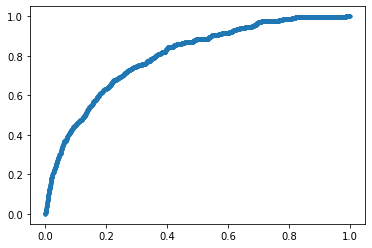

In [15]:
plt.plot(fpr, tpr, marker='.')
plt.show()

## Precision-recall curve

In [22]:
precision, recall, thresholds = precision_recall_curve(y_test, y_test_prob)
f1 = f1_score(y_test, y_test_pred)
prauc = auc(recall, precision)

In [23]:
print(f'F1 score: {f1:.1%}')
print(f'Precision-recall AUC: {prauc:.1%}')

F1 score: 0.0%
Precision-recall AUC: 14.5%


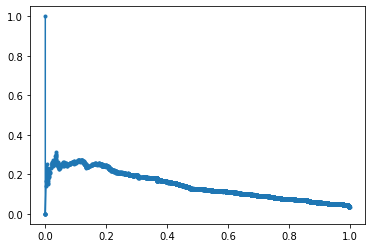

In [24]:
plt.plot(recall, precision, marker='.')
plt.show()

## Apply weight

In [28]:
num_pos = sum(df_model['target'])
num_neg = len(df_model) - num_pos
scale_pos_weight = num_neg / num_pos
print(f'scale_pos_weight: {scale_pos_weight:.1f}')

scale_pos_weight: 27.3


In [29]:
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric=EVAL_METRIC,
    max_depth=MAX_DEPTH,
    learning_rate=LEARNING_RATE,
    alpha=ALPHA,
    colsample_bytree=COLSAMPLE_BYTREE,
    scale_pos_weight=scale_pos_weight
)

In [30]:
model.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, eval_metric='aucpr', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=10, reg_lambda=1,
              scale_pos_weight=27.312630480167016, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

## Predict test data by model with weight

In [35]:
y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)
y_train_prob = y_train_prob[:, 1]

y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)
y_test_prob = y_test_prob[:, 1]

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_score_train = f1_score(y_train, y_train_pred)
f1_score_test = f1_score(y_test, y_test_pred)
roc_auc_train = roc_auc_score(y_train, y_train_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)

In [36]:
print(f'Train, accuracy: {accuracy_train:.1%}, precision: {precision_train:.1%}, '
      f'recall: {recall_train:.1%}, f1: {f1_score_train:.1%}, auc: {roc_auc_train:.1%}')
print(f'Test, accuracy: {accuracy_test:.1%}, precision: {precision_test:.1%}, '
      f'recall: {recall_test:.1%}, f1: {f1_score_test:.1%}, auc: {roc_auc_test:.1%}')

Train, accuracy: 69.9%, precision: 8.9%, recall: 82.3%, f1: 16.1%, auc: 84.3%
Test, accuracy: 69.0%, precision: 8.4%, recall: 77.6%, f1: 15.2%, auc: 79.8%


## ROC with weight

In [37]:
prob = model.predict_proba(X_test)
prob = prob[:, 1]

# False positive rage and true positive rate
fpr, tpr, _ = roc_curve(y_test, prob)

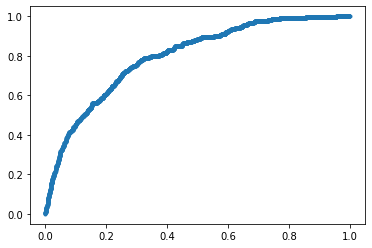

In [38]:
plt.plot(fpr, tpr, marker='.')
plt.show()

## Precision-recall curve with weight

In [39]:
precision, recall, thresholds = precision_recall_curve(y_test, y_test_prob)
f1 = f1_score(y_test, y_test_pred)
prauc = auc(recall, precision)

In [40]:
print(f'F1 score: {f1:.1%}')
print(f'Precision-recall AUC: {prauc:.1%}')

F1 score: 15.2%
Precision-recall AUC: 14.0%


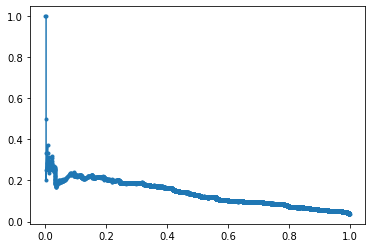

In [41]:
plt.plot(recall, precision, marker='.')
plt.show()

## Apply SMOTE

In [42]:
over = SMOTE()
steps = [('o', over)]

pipeline = Pipeline(steps=steps)
X_train_smote, y_train_smote = pipeline.fit_resample(X_train, y_train)

In [43]:
counter = Counter(y_train_smote)
print(counter)

Counter({0: 41869, 1: 41869})


In [44]:
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric=EVAL_METRIC,
    max_depth=MAX_DEPTH,
    learning_rate=LEARNING_RATE,
    alpha=ALPHA,
    colsample_bytree=COLSAMPLE_BYTREE
)

In [45]:
model.fit(X_train_smote, y_train_smote)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, eval_metric='aucpr', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

## Predict test data by model with SMOTE

In [46]:
y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)
y_train_prob = y_train_prob[:, 1]

y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)
y_test_prob = y_test_prob[:, 1]

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_score_train = f1_score(y_train, y_train_pred)
f1_score_test = f1_score(y_test, y_test_pred)
roc_auc_train = roc_auc_score(y_train, y_train_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)

In [47]:
print(f'Train, accuracy: {accuracy_train:.1%}, precision: {precision_train:.1%}, '
      f'recall: {recall_train:.1%}, f1: {f1_score_train:.1%}, auc: {roc_auc_train:.1%}')
print(f'Test, accuracy: {accuracy_test:.1%}, precision: {precision_test:.1%}, '
      f'recall: {recall_test:.1%}, f1: {f1_score_test:.1%}, auc: {roc_auc_test:.1%}')

Train, accuracy: 90.6%, precision: 15.4%, recall: 37.3%, f1: 21.8%, auc: 80.0%
Test, accuracy: 90.5%, precision: 14.6%, recall: 34.5%, f1: 20.6%, auc: 78.8%


## Apply SMOTE with undersampling majority

In [49]:
over = SMOTE(sampling_strategy=SAMPLING_STRATEGY_01)
under = RandomUnderSampler(sampling_strategy=SAMPLING_STRATEGY_02)
steps = [('o', over), ('u', under)]

pipeline = Pipeline(steps=steps)
X_train_smote, y_train_smote = pipeline.fit_resample(X_train, y_train)

In [50]:
counter = Counter(y_train_smote)
print(counter)

Counter({0: 8372, 1: 4186})


In [51]:
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric=EVAL_METRIC,
    max_depth=MAX_DEPTH,
    learning_rate=LEARNING_RATE,
    alpha=ALPHA,
    colsample_bytree=COLSAMPLE_BYTREE
)

In [52]:
model.fit(X_train_smote, y_train_smote)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, eval_metric='aucpr', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

## Predict test data by model with SMOTE

In [53]:
y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)
y_train_prob = y_train_prob[:, 1]

y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)
y_test_prob = y_test_prob[:, 1]

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_score_train = f1_score(y_train, y_train_pred)
f1_score_test = f1_score(y_test, y_test_pred)
roc_auc_train = roc_auc_score(y_train, y_train_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)

In [54]:
print(f'Train, accuracy: {accuracy_train:.1%}, precision: {precision_train:.1%}, '
      f'recall: {recall_train:.1%}, f1: {f1_score_train:.1%}, auc: {roc_auc_train:.1%}')
print(f'Test, accuracy: {accuracy_test:.1%}, precision: {precision_test:.1%}, '
      f'recall: {recall_test:.1%}, f1: {f1_score_test:.1%}, auc: {roc_auc_test:.1%}')

Train, accuracy: 91.0%, precision: 16.2%, recall: 37.6%, f1: 22.7%, auc: 81.6%
Test, accuracy: 91.1%, precision: 15.8%, recall: 34.8%, f1: 21.8%, auc: 80.0%
